import neccessary liberaries

In [1]:
import yfinance as yf
import os
import sys

sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

# Load Tesla data
tsla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')['Adj Close']
BND_data = yf.download('BND', start='2010-01-01', end='2023-12-31')['Adj Close']
SPY_data = yf.download('SPY', start='2010-01-01', end='2023-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


import the class form scripts folder 

In [9]:
from TimeSeriesForecast import TimeSeriesForecast

instantiate the class

In [12]:
# Instantiate the forecasting class
TimeSeriesForecas = TimeSeriesForecast(tsla_data)
TimeSeriesForecast_for_spy = TimeSeriesForecast(tsla_data)
TimeSeriesForecast_for_bnd = TimeSeriesForecast(BND_data)



Data split into 2720 training samples and 680 testing samples.
Data split into 2720 training samples and 680 testing samples.
Data split into 2817 training samples and 705 testing samples.


ARIMA model

In [ ]:
# Train the ARIMA model
TimeSeriesForecast.train_arima(order=(5, 1, 0))



In [ ]:
# Forecast future stock prices
predictions = TimeSeriesForecast.forecast_arima()



In [6]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecast.evaluate_forecast()



Mean Absolute Error (MAE): 44.76951005016132
Root Mean Squared Error (RMSE): 58.45733650633049
Mean Absolute Percentage Error (MAPE): 19.10712190739271%


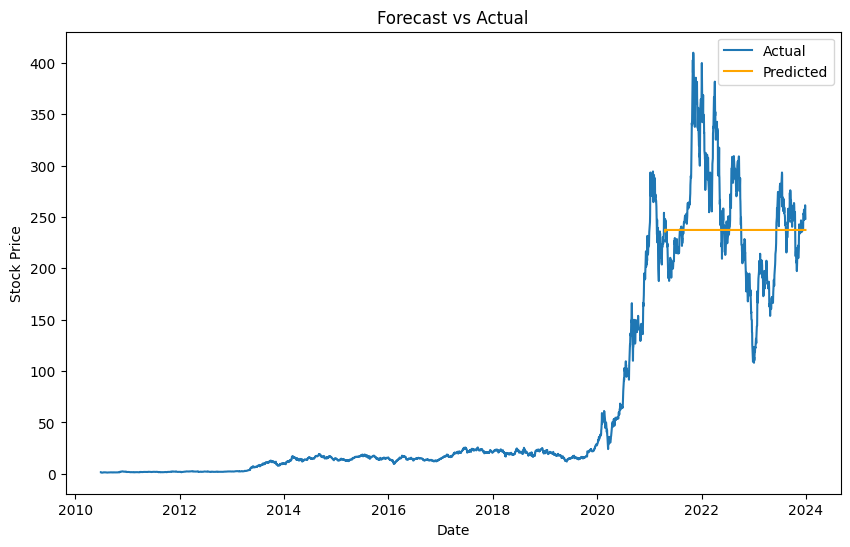

In [7]:
# Plot the results
TimeSeriesForecast.plot_forecast()

SARIMA model

In [ ]:
# Train the SARIMA model
TimeSeriesForecast.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))



In [ ]:
# Forecast future stock prices
sarima_predictions = TimeSeriesForecast.forecast_sarima()



In [10]:
# Evaluate the forecast
TimeSeriesForecast.evaluate_forecast()


Mean Absolute Error (MAE): 141.98606557414152
Root Mean Squared Error (RMSE): 174.62709288533625
Mean Absolute Percentage Error (MAPE): 67.88039173399966%


(np.float64(141.98606557414152),
 174.62709288533625,
 np.float64(67.88039173399966))

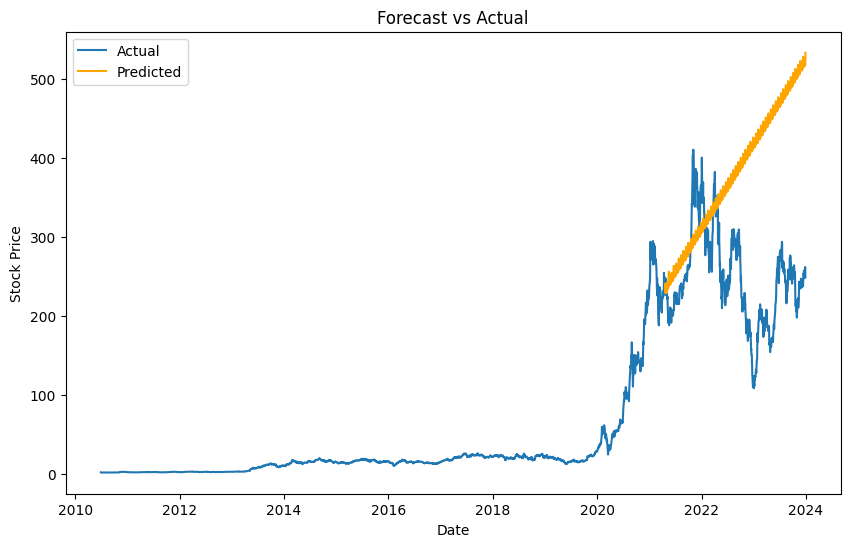

In [11]:

# Plot the results
TimeSeriesForecast.plot_forecast()

LSTM model

In [12]:
# Preprocess data for LSTM
TimeSeriesForecast.preprocess_for_lstm(window_size=60)



Data preprocessed for LSTM model.


In [13]:
# Train the LSTM model
TimeSeriesForecast.train_lstm(epochs=50, batch_size=32)



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0030
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.0542e-04
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.7533e-04
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.3042e-04
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.1342e-04
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9907e-04
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.1787e-04
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.7005e-04
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3736e-04
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.7526e-04
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5518e-04
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.2618e-04
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.7432e-04
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.9424e-04
Epoch 15/50
84/84 ━

In [14]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecast.forecast_lstm()



21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [15]:
# Evaluate the forecast
TimeSeriesForecast.evaluate_forecast()



Mean Absolute Error (MAE): 22.649277841259618
Root Mean Squared Error (RMSE): 29.391321758375472
Mean Absolute Percentage Error (MAPE): 9.290321697355552%


(np.float64(22.649277841259618),
 29.391321758375472,
 np.float64(9.290321697355552))

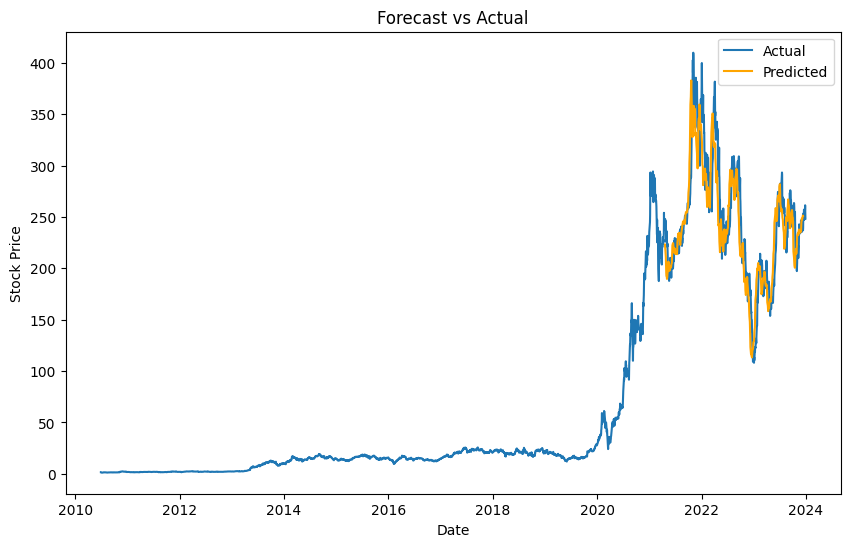

In [16]:
# Plot the results
TimeSeriesForecast.plot_forecast()

for BND data

In [18]:
BND_data

Ticker,BND
Date,
2010-01-04 00:00:00+00:00,51.721798
2010-01-05 00:00:00+00:00,51.872990
2010-01-06 00:00:00+00:00,51.853264
2010-01-07 00:00:00+00:00,51.813839
2010-01-08 00:00:00+00:00,51.866440
...,...
2023-12-22 00:00:00+00:00,71.401619
2023-12-26 00:00:00+00:00,71.469749
2023-12-27 00:00:00+00:00,71.927208


ARIMA model for bnd 

In [14]:
# Train the ARIMA model
TimeSeriesForecast_for_bnd.train_arima(order=(5, 1, 0))

ARIMA model trained successfully.


c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
# Forecast future stock prices
predictions = TimeSeriesForecast_for_bnd.forecast_arima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecast_for_bnd.evaluate_forecast()


Mean Absolute Error (MAE): 5.191607656670394
Root Mean Squared Error (RMSE): 6.112933599349602
Mean Absolute Percentage Error (MAPE): 7.471685020591185%


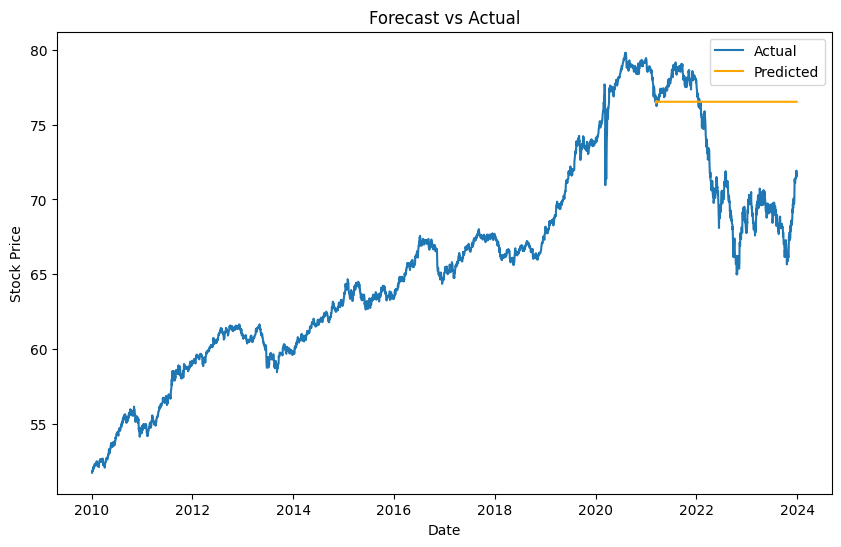

In [17]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

SARIMA model

In [18]:
# Train the SARIMA model
TimeSeriesForecast_for_bnd.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model trained successfully.


In [19]:
# Forecast future stock prices
sarima_predictions = TimeSeriesForecast_for_bnd.forecast_sarima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
# Evaluate the forecast
TimeSeriesForecast_for_bnd.evaluate_forecast()


Mean Absolute Error (MAE): 7.65066685133133
Root Mean Squared Error (RMSE): 9.303632003392991
Mean Absolute Percentage Error (MAPE): 11.05682642200107%


(np.float64(7.65066685133133),
 9.303632003392991,
 np.float64(11.05682642200107))

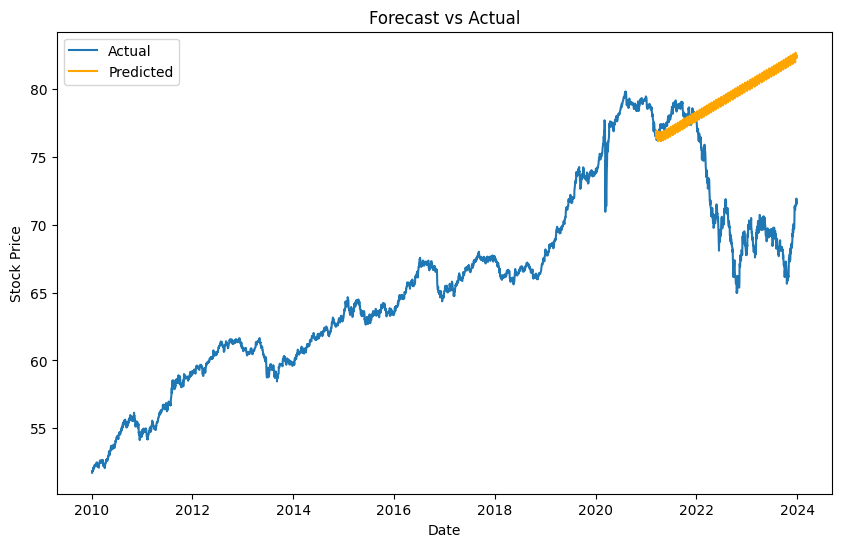

In [21]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

LSTM model

In [22]:
# Preprocess data for LSTM
TimeSeriesForecast_for_bnd.preprocess_for_lstm(window_size=60)

Data preprocessed for LSTM model.


In [23]:
# Train the LSTM model
TimeSeriesForecast_for_bnd.train_lstm(epochs=50, batch_size=32)

Epoch 1/50


c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0444
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0026
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0025
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0021
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0021
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0018
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0017
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0017
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0014
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0012
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0013
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0014
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0014
Epoch 16/50
87/

In [24]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecast_for_bnd.forecast_lstm()

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [25]:
# Evaluate the forecast
TimeSeriesForecast_for_bnd.evaluate_forecast()

Mean Absolute Error (MAE): 0.6211785650872564
Root Mean Squared Error (RMSE): 0.7778157122406321
Mean Absolute Percentage Error (MAPE): 0.8746818822617047%


(np.float64(0.6211785650872564),
 0.7778157122406321,
 np.float64(0.8746818822617047))

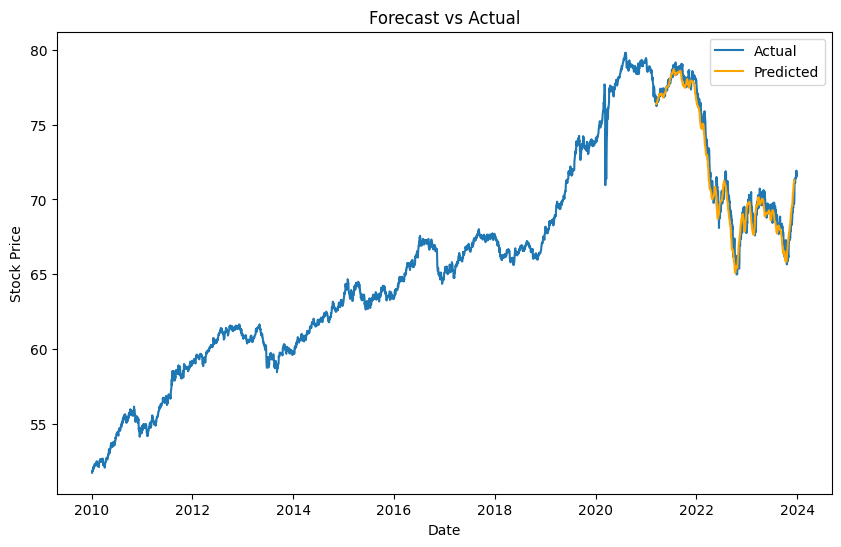

In [26]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()